In [186]:
import matplotlib.backends.backend_tkagg
import matplotlib
matplotlib.use("Agg")  # or whichever backend you wish to use
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import os,re
import json
import glob
import pandas as pd
import time,pytz
import datetime
import math
import seaborn as sns
import numpy as np
import sklearn
from sklearn import linear_model

In [2]:
in_dir = r'C:\Users\u6037208\Box\Twitter\Tweets'
out_dir = r'C:\Users\u6037208\Box\Twitter\Analysis\Output'
twt_file = r'C:\Users\u6037208\Box\Twitter\Tweets\US_COVID_tweets.csv'

In [4]:
tweets = pd.read_csv(twt_file)
tweets.drop(columns =["user.time_zone", "_id","id","id_str","place.country_code","user.id","user.id_str","place.name","place.place_type","user.name","coordinates.coordinates"],inplace = True)
tweets.head()

,created_at,full_text,geo.coordinates,coordinates,place.full_name,user.location
0,Thu Mar 19 20:16:05 +0000 2020,Many ask us how they can support us during all...,"[25.67931,-80.31869]","25.67931,-80.31869","Kendall, FL",9800 SW 77th Av Miami FL 33156
1,Thu Mar 19 20:39:55 +0000 2020,We wish that ceramic coating protected us from...,"[41.07291,-111.99674]","41.07291,-111.99674","Layton, UT","Layton, UT"
2,Thu Mar 19 20:28:50 +0000 2020,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,"[40.85,-73.8669]","40.85,-73.8669","Bronx, NY","New York, NY"
3,Thu Mar 19 21:02:22 +0000 2020,"Day 3.... Corona-0, QueRona-3! Workout complet...","[32.7774,-96.7977]","32.7774,-96.7977","Dallas, TX",Dallas
4,Thu Mar 19 21:05:44 +0000 2020,Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,"[34.1649,-118.3965]","34.1649,-118.3965","Los Angeles, CA",TX → LA


In [5]:
# df['Discounted_Price'] = df.apply(lambda row: row.Cost - 
#                                   (row.Cost * 0.1), axis = 1)

tweets['create_time'] = tweets.apply(lambda row: datetime.datetime.strptime(row["created_at"],'%a %b %d %H:%M:%S +0000 %Y'),axis =1) 
tweets.head()

,created_at,full_text,geo.coordinates,coordinates,place.full_name,user.location,create_time
0,Thu Mar 19 20:16:05 +0000 2020,Many ask us how they can support us during all...,"[25.67931,-80.31869]","25.67931,-80.31869","Kendall, FL",9800 SW 77th Av Miami FL 33156,2020-03-19 20:16:05
1,Thu Mar 19 20:39:55 +0000 2020,We wish that ceramic coating protected us from...,"[41.07291,-111.99674]","41.07291,-111.99674","Layton, UT","Layton, UT",2020-03-19 20:39:55
2,Thu Mar 19 20:28:50 +0000 2020,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,"[40.85,-73.8669]","40.85,-73.8669","Bronx, NY","New York, NY",2020-03-19 20:28:50
3,Thu Mar 19 21:02:22 +0000 2020,"Day 3.... Corona-0, QueRona-3! Workout complet...","[32.7774,-96.7977]","32.7774,-96.7977","Dallas, TX",Dallas,2020-03-19 21:02:22
4,Thu Mar 19 21:05:44 +0000 2020,Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,"[34.1649,-118.3965]","34.1649,-118.3965","Los Angeles, CA",TX → LA,2020-03-19 21:05:44


In [6]:
tweets["create_time"][0]>tweets["create_time"][1]
type(tweets["create_time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# separate tweets into three waves, wave 1: March 1-May 31;wave 2: June 1-Aug 31; wave 3: Sep 1 - Dec 31, 2020
tweets.loc[tweets.create_time <='2020-05-31','Wave'] = "Wave 1"
tweets.loc[(tweets.create_time >'2020-05-31') & (tweets.create_time <='2020-08-31'),'Wave'] = "Wave 2"
tweets.loc[tweets.create_time > '2020-09-01','Wave'] = "Wave 3"


tweets.set_index('create_time', drop=False, append=False, inplace=True, verify_integrity=False)
tweets= tweets.sort_index(ascending=True)
tweets.head(12)

,created_at,full_text,geo.coordinates,coordinates,place.full_name,user.location,create_time,Wave
create_time,,,,,,,,
2020-03-19 19:53:17,Thu Mar 19 19:53:17 +0000 2020,#statewaterheaters #getitin #corona #keepingpe...,"[39.8841,-82.759]","39.8841,-82.759","Pickerington, OH",ohio,2020-03-19 19:53:17,Wave 1
2020-03-19 19:53:46,Thu Mar 19 19:53:46 +0000 2020,"""ain't no humans outside! (corona!)"" 😂😂😂🤣 @ Cl...","[41.4996,-81.6937]","41.4996,-81.6937","Cleveland, OH",Simple Pleasures Lane,2020-03-19 19:53:46,Wave 1
2020-03-19 19:56:46,Thu Mar 19 19:56:46 +0000 2020,"current weather in Corona: moderate rain, 56°F...","[33.88,-117.58]","33.88,-117.58","Corona, CA","Corona, CA",2020-03-19 19:56:46,Wave 1
2020-03-19 19:58:28,Thu Mar 19 19:58:28 +0000 2020,Quarantine 🏓 training ! Adding some kicks 💥. \...,"[34.0522,-118.243]","34.0522,-118.243","Los Angeles, CA",Los Angeles,2020-03-19 19:58:28,Wave 1
2020-03-19 20:05:01,Thu Mar 19 20:05:01 +0000 2020,#quarantine #stockpiling #food #sexylatino #la...,"[34.1509,-118.355]","34.1509,-118.355","Los Angeles, CA","North Hollywood, Los Angeles",2020-03-19 20:05:01,Wave 1
2020-03-19 20:06:34,Thu Mar 19 20:06:34 +0000 2020,You know you got a good friend when they send ...,"[34.07347,-118.40033]","34.07347,-118.40033","Beverly Hills, CA","Beverly Hills, California",2020-03-19 20:06:34,Wave 1
2020-03-19 20:08:58,Thu Mar 19 20:08:58 +0000 2020,How’s My Quarantine Going You Ask??? Well... L...,"[38.0297,-84.4947]","38.0297,-84.4947","Kentucky, USA","Lexington, KY",2020-03-19 20:08:58,Wave 1
2020-03-19 20:12:13,Thu Mar 19 20:12:13 +0000 2020,The rarest diamonds on planet Earth. The pink ...,"[18.35,-64.9004]","18.35,-64.9004","Charlotte Amalie, Virgin Islands","St. Thomas, USVI",2020-03-19 20:12:13,Wave 1
2020-03-19 20:12:28,Thu Mar 19 20:12:28 +0000 2020,Well one positive thing about this Corona Viru...,"[42.6703,-71.3025]","42.6703,-71.3025","Dracut, MA",NaN,2020-03-19 20:12:28,Wave 1


In [8]:
# returns the # of weeks after Mar 1, 2020. i.e., Mar 8, 2020 will be the 2nd week. 
def find_weeks(time):
    start = datetime.datetime.strptime("Thu Mar 19 19:53:17 +0000 2020",'%a %b %d %H:%M:%S +0000 %Y')
    time1 = datetime.datetime.strptime(time,'%a %b %d %H:%M:%S +0000 %Y')
    tt = math.floor((time1-start).days/7)+1
    return tt

In [9]:
tweets['Week'] = tweets["created_at"].apply(find_weeks)
#tweets.head(10)

<IPython.core.display.Javascript object>


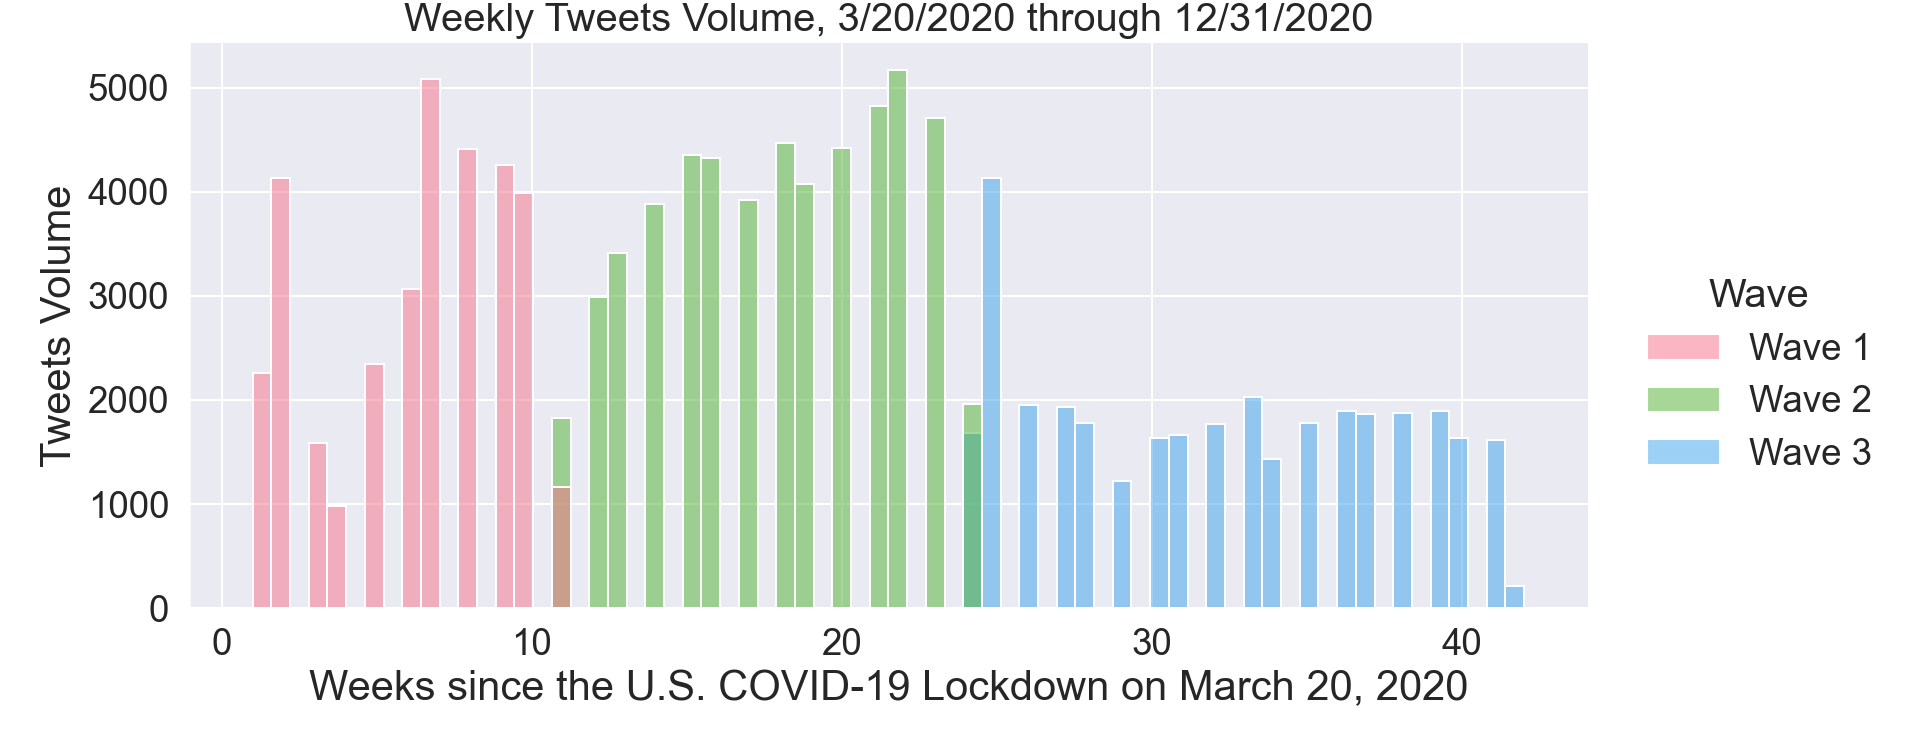

In [10]:
### tweets.groupby(["week"]).size().plot(kind = "bar",figsize =(10,10),color )
# use unstack()
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)
sns.set(font_scale=1.6)
g = sns.displot(data = tweets, x= "Week",kde = False, hue = "Wave",palette =sns.color_palette("husl", 3), height=5, aspect=2.2)
g.set_axis_labels("Weeks since the U.S. COVID-19 Lockdown on March 20, 2020", "Tweets Volume", fontsize = 20)
g.set_titles("Weekly Tweets Volume between March 1-December 31, 2020")
plt.title("Weekly Tweets Volume, 3/20/2020 through 12/31/2020")
plt.show()

In [11]:
# add 4 cols: Asain(138), Black(2278), Latino(478), Whites (1156)
tweets.loc[tweets['full_text'].str.lower().str.contains('asia'), 'Asian'] = 1
tweets.loc[tweets['full_text'].str.lower().str.contains('black'), 'Black'] = 1
tweets.loc[tweets['full_text'].str.lower().str.contains('latin'), 'Latino'] = 1
tweets.loc[tweets['full_text'].str.lower().str.contains('hispanic'), 'Latino'] = 1
tweets.loc[tweets['full_text'].str.lower().str.contains('white'), 'White'] = 1

In [12]:
tweets[tweets['Latino']==1].head()


,created_at,full_text,geo.coordinates,coordinates,place.full_name,user.location,create_time,Wave,Week,Asian,Black,Latino,White
create_time,,,,,,,,,,,,,
2020-03-19 20:05:01,Thu Mar 19 20:05:01 +0000 2020,#quarantine #stockpiling #food #sexylatino #la...,"[34.1509,-118.355]","34.1509,-118.355","Los Angeles, CA","North Hollywood, Los Angeles",2020-03-19 20:05:01,Wave 1,1,NaN,NaN,1.0,NaN
2020-03-20 09:19:43,Fri Mar 20 09:19:43 +0000 2020,Thanks for sharing 33.666.9999\n#drdrew\n\nRep...,"[25.7752,-80.192]","25.7752,-80.192","Miami, FL","Allapattah, U.S.A.",2020-03-20 09:19:43,Wave 1,1,NaN,NaN,1.0,NaN
2020-03-21 17:51:32,Sat Mar 21 17:51:32 +0000 2020,"Lesbian social isolating. #corona🍺 @ New York,...","[40.7142,-74.0064]","40.7142,-74.0064","Manhattan, NY","London, England",2020-03-21 17:51:32,Wave 1,1,NaN,NaN,1.0,NaN
2020-03-23 12:00:54,Mon Mar 23 12:00:54 +0000 2020,Would have been here now #stayhomesavelives #s...,"[27.37691,-82.63402]","27.37691,-82.63402","Longboat Key, FL","Halifax, Nova Scotia, Canada",2020-03-23 12:00:54,Wave 1,1,NaN,NaN,1.0,NaN
2020-03-24 00:44:01,Tue Mar 24 00:44:01 +0000 2020,Tonight's corona special. L51&amp;L52 \n#princ...,"[40.6215,-74.2452]","40.6215,-74.2452","Linden, NJ",NaN,2020-03-24 00:44:01,Wave 1,1,NaN,NaN,1.0,NaN


In [13]:
tweets.to_csv(r'C:\Users\u6037208\Box\Twitter\Tweets\US_COVID_tweets_10152020.csv')

In [19]:
#tweets.drop(columns =["wave","week"], inplace = True)

# most rows in "place.full_name" use format "city name, state name" format, str[-2:] takes the last 2 characters (state abbreviation)
# and save it to a new field "State". 
tweets["State"] = tweets["place.full_name"].str[-2:]
tweets["State"]

create_time
2020-03-19 19:53:17    OH
2020-03-19 19:53:46    OH
2020-03-19 19:56:46    CA
2020-03-19 19:58:28    CA
2020-03-19 20:05:01    CA
                       ..
2021-01-01 04:15:06    NY
2021-01-01 04:15:34    TX
2021-01-01 04:19:14    GA
2021-01-01 04:23:45    SA
2021-01-01 04:24:39    NY
Name: State, Length: 122120, dtype: object

In [341]:
# There are 12252 rows with a state abbreviation of "SA", which means the last 2 characters are not state abbr but "USA"
# need to identify those rows and assign correct state abbrs in "State" field
state_name = tweets["State"].value_counts().to_frame()
state_name.to_csv("State_name_check.csv")

In [20]:
state_name = []
state_name =list(set(list(tweets["State"])))
len(state_name)
state_name.sort(reverse=True)
# after sort alphabetically, the first 23 are lower case ones, which are made up state names, so will be skipped
#state_name[23:]


In [21]:

# st_name contains the names and abbrivations of 50 US states and DC. 
st_name =pd.read_csv(r'C:\Users\u6037208\Box\Twitter\Tweets\US_States_full name_vs_Abbr.csv', names=('State', 'ST')) 

# 12252 rows in column "place.full_name" use "state name, USA" format, 
# while the rest use "city name, state abbrivation" format. This step look for those 12252 rows, and replace 
# the full state with state abbreviations to be consistent with other rows

for index, row in tweets.iterrows():
    if 'SA' in row["State"]:
        for index2,row2 in st_name.iterrows():
            tweets[row["place.full_name"][:-5] in row2["State"],'State'] = row2["ST"]

print (tweets.head())
# tweets[tweets["State"]=="SA"]

                                         created_at  \
create_time                                           
2020-03-19 19:53:17  Thu Mar 19 19:53:17 +0000 2020   
2020-03-19 19:53:46  Thu Mar 19 19:53:46 +0000 2020   
2020-03-19 19:56:46  Thu Mar 19 19:56:46 +0000 2020   
2020-03-19 19:58:28  Thu Mar 19 19:58:28 +0000 2020   
2020-03-19 20:05:01  Thu Mar 19 20:05:01 +0000 2020   

                                                             full_text  \
create_time                                                              
2020-03-19 19:53:17  #statewaterheaters #getitin #corona #keepingpe...   
2020-03-19 19:53:46  "ain't no humans outside! (corona!)" 😂😂😂🤣 @ Cl...   
2020-03-19 19:56:46  current weather in Corona: moderate rain, 56°F...   
2020-03-19 19:58:28  Quarantine 🏓 training ! Adding some kicks 💥. \...   
2020-03-19 20:05:01  #quarantine #stockpiling #food #sexylatino #la...   

                        geo.coordinates       coordinates   place.full_name  \
create_time     

In [22]:
# The "place.full_name" field for many rows ends with "San Francisco", so the Stata abbreviation were "co", change "co" to "CA" 
# co= tweets[tweets['State']=='co']
# co.to_csv("co.csv")
 
tweets.loc[tweets.State =='co','State'] = "CA"
tweets[tweets['State']=='co']

,created_at,full_text,geo.coordinates,coordinates,place.full_name,user.location,create_time,Wave,Week,Asian,Black,Latino,White,State,"(False, State)","(True, State)"
create_time,,,,,,,,,,,,,,,,


In [23]:
# create a new dataframe sumarizing tweets volume for each race by wave and state
TW_Wave_State = tweets.groupby(["Wave","State"]).sum()

TW_Wave_State.columns = ['Week', 'Asian','Black','Latino', 'White']
# reset index to get grouped columns back
TW_Wave_State = TW_Wave_State.reset_index()
TW_Wave_State.head()
TW_Wave_State.to_csv('tweet_summary_by_wave_state.csv')
# in the "tweet_summary_by_wave_state_process.csv", deleted the rows without a valid state name, also  because 
# those records hardly contain any race name word 

In [24]:
#import the file with COVID cases and deaths by each race
COVID_file = r'C:\Users\u6037208\Box\Twitter\COVID_data\COVID_case_death_state_race_process.csv'
covid = pd.read_csv(COVID_file)
covid.head()

,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian
0,20201230,AK,14623.0,1245.0,NaN,1864.0,74.0,8.0,NaN,20.0
1,20201230,AL,111969.0,59617.0,NaN,1378.0,2404.0,1352.0,NaN,15.0
2,20201230,AR,140576.0,37146.0,NaN,2002.0,2550.0,540.0,NaN,22.0
3,20201230,AZ,162683.0,14804.0,147562.0,6281.0,3960.0,243.0,2503.0,87.0
4,20201230,CA,319136.0,64518.0,887580.0,100569.0,7679.0,1697.0,11575.0,2818.0


In [28]:
covid['create_time'] = covid.apply(lambda row: datetime.datetime.strptime(str(row["Time"]),'%Y%m%d'),axis =1) 
covid.head()

,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,create_time
0,20201230,AK,14623.0,1245.0,NaN,1864.0,74.0,8.0,NaN,20.0,2020-12-30
1,20201230,AL,111969.0,59617.0,NaN,1378.0,2404.0,1352.0,NaN,15.0,2020-12-30
2,20201230,AR,140576.0,37146.0,NaN,2002.0,2550.0,540.0,NaN,22.0,2020-12-30
3,20201230,AZ,162683.0,14804.0,147562.0,6281.0,3960.0,243.0,2503.0,87.0,2020-12-30
4,20201230,CA,319136.0,64518.0,887580.0,100569.0,7679.0,1697.0,11575.0,2818.0,2020-12-30


In [91]:
# separate covid cases and deaths into three waves, wave 1: March 1-May 31;wave 2: June 1-Aug 31; wave 3: Sep 1 - Dec 31, 2020
# 
covid.loc[covid.create_time <='2020-05-31','Wave'] = "Wave 1"
covid.loc[(covid.create_time >'2020-05-31') & (covid.create_time <='2020-08-31'),'Wave'] = "Wave 2"
covid.loc[covid.create_time > '2020-09-01','Wave'] = "Wave 3"


covid.set_index('create_time', drop=False, append=False, inplace=True, verify_integrity=False)
covid= covid.sort_index(ascending=True)
covid.head(4)

,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,create_time,Wave,Week,Total_Cases,Total_Deaths
create_time,,,,,,,,,,,,,,,
2020-04-12,20200412,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,MD,2300.0,3200.0,NaN,190.0,83.0,104.0,NaN,8.0,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,MA,4271.0,1358.0,1885.0,331.0,199.0,20.0,28.0,13.0,2020-04-12,Wave 1,4,7845.0,260.0


In [30]:
# returns the # of weeks after Mar 20, 2020. i.e., Mar 8, 2020 will be the 2nd week. 
def find_weeks_covid(time):
    start = datetime.datetime.strptime("20200320",'%Y%m%d')
    time1 = datetime.datetime.strptime(str(time),'%Y%m%d')
    week_no = math.floor((time1-start).days/7)+1
    return  week_no

In [90]:
covid['Week'] = covid["Time"].apply(find_weeks_covid)
covid.tail(5)

,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,create_time,Wave,Week,Total_Cases,Total_Deaths
create_time,,,,,,,,,,,,,,,
2020-12-30,20201230,NE,87234.0,4464.0,NaN,2429.0,1105.0,58.0,NaN,23.0,2020-12-30,Wave 3,41,NaN,NaN
2020-12-30,20201230,ND,49538.0,2678.0,NaN,1255.0,NaN,NaN,NaN,NaN,2020-12-30,Wave 3,41,NaN,NaN
2020-12-30,20201230,NC,271212.0,91016.0,NaN,7989.0,4140.0,1692.0,NaN,80.0,2020-12-30,Wave 3,41,NaN,NaN
2020-12-30,20201230,MS,97054.0,72243.0,4770.0,871.0,2416.0,1957.0,50.0,15.0,2020-12-30,Wave 3,41,174938.0,4438.0
2020-12-30,20201230,AK,14623.0,1245.0,NaN,1864.0,74.0,8.0,NaN,20.0,2020-12-30,Wave 3,41,NaN,NaN


In [154]:
covid['Total_Cases'] = covid["Cases_White"] + covid["Cases_Black"] + covid["Cases_Latinx"] + covid["Cases_Asian"]
covid['Total_Deaths'] = covid["Deaths_White"] + covid["Deaths_Black"] + covid["Deaths_Latinx"] + covid["Deaths_Asian"]
covid.head()

,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,create_time,Wave,Week,Total_Cases,Total_Deaths
create_time,,,,,,,,,,,,,,,
2020-04-12,20200412,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,MD,2300.0,3200.0,NaN,190.0,83.0,104.0,NaN,8.0,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,MA,4271.0,1358.0,1885.0,331.0,199.0,20.0,28.0,13.0,2020-04-12,Wave 1,4,7845.0,260.0
2020-04-12,20200412,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN


In [155]:
covid.columns

covid_case_death_by_state = covid[['State', 'Wave', 'Week', 'Total_Cases','Total_Deaths']]
# covid_case_death_by_state.to_csv('COVID_case_death_by_wave_week_state.csv')

# covid_case_death dataframe keeps "create_time"(date),'Wave', 'Week' fields, and sum the data across all states

covid_case_death = covid[['State', 'Wave', 'Week', 'Total_Cases','Total_Deaths']].groupby(["create_time",'Wave', 'Week']).agg({'Total_Cases':['sum'],"Total_Deaths":['sum']})
# # rename columns
covid_case_death.columns = ['Total_Cases','Total_Deaths']
# # # reset index to get grouped columns back
covid_case_death = covid_case_death.reset_index()
covid_case_death.head()

# covid_case_death.to_csv('COVID_case_death_by_wave_week_all_races_all_states.csv')

# covid_case_death = covid.groupby(["Week","Wave"]).agg({"Total_Cases":['max'],"Total_Deaths":['max']})
# covid_case_death 

,create_time,Wave,Week,Total_Cases,Total_Deaths
0,2020-04-12,Wave 1,4,51481.0,2350.0
1,2020-04-15,Wave 1,4,78892.0,11537.0
2,2020-04-19,Wave 1,5,92132.0,16975.0
3,2020-04-22,Wave 1,5,127286.0,14309.0
4,2020-04-26,Wave 1,6,149384.0,16703.0


In [97]:
# The data was collected every 3 days, so there are two dates within each week. 
# Cases and deaths were cumulative, to get the increased cases/deaths within the week, use the data on 2nd date minus 1st date 
covid_case_death.tail()


,create_time,Wave,Week,Total_Cases,Total_Deaths
71,2020-12-16,Wave 3,39,4656860.0,169101.0
72,2020-12-20,Wave 3,40,4943921.0,175062.0
73,2020-12-23,Wave 3,40,5116795.0,178054.0
74,2020-12-27,Wave 3,41,5249850.0,181857.0
75,2020-12-30,Wave 3,41,5514207.0,186270.0


In [156]:
# The data was collected every 3 days, so there are two dates within each week. 
# Cases and deaths were cumulative, to get the increased cases/deaths within the week, use the data on 2nd date minus 1st date 
covid_wk_case_death =covid_case_death
covid_wk_case_death['Cases_Diff'] = covid_case_death['Total_Cases'].diff() # use diff() to get the diff btw data of 2 dates within the week
covid_wk_case_death['Deaths_Diff'] = covid_case_death['Total_Deaths'].diff()
covid_wk_case_death_2 = covid_wk_case_death[1::2] # select the odd numbered rows, which are the increased cases & deaths
covid_wk_case_death_2.head()


,create_time,Wave,Week,Total_Cases,Total_Deaths,Cases_Diff,Deaths_Diff
1,2020-04-15,Wave 1,4,78892.0,11537.0,27411.0,9187.0
3,2020-04-22,Wave 1,5,127286.0,14309.0,35154.0,-2666.0
5,2020-04-29,Wave 1,6,170955.0,25989.0,21571.0,9286.0
7,2020-05-06,Wave 1,7,242666.0,34173.0,22815.0,2057.0
9,2020-05-13,Wave 1,8,352543.0,41236.0,82117.0,3093.0


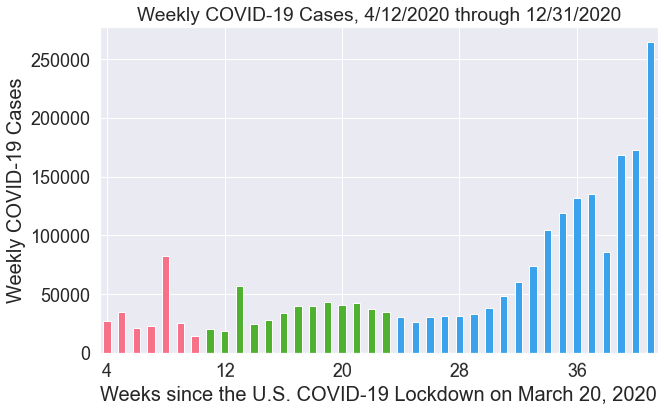

In [164]:
# plot the weekly cases

covid_wk_case_death_2 = covid_wk_case_death_2.set_index("Week")
colours = {"Wave 1": "#F77189", "Wave 2": "#50B131", "Wave 3": "#3BA3EC"}

ax =covid_wk_case_death_2.Cases_Diff.plot(kind = 'bar', figsize=(10,6),fontsize=18, color=covid_wk_case_death_2['Wave'].replace(colours), title = "Weekly COVID-19 Cases, 4/12/2020 through 12/31/2020")
# ax.set_xtick(['0','10','20','30','40'])
plt.xticks(rotation=1, horizontalalignment="center")
plt.locator_params(axis="x", nbins=5) # change the number of x-axis ticks
plt.xlabel('Weeks since the U.S. COVID-19 Lockdown on March 20, 2020', fontsize=20)
plt.ylabel('Weekly COVID-19 Cases', fontsize=20)
plt.savefig(out_dir + "\Weekly COVID-19 Cases.jpg",dpi=300)
# ax.legend(['Wave 1', 'Wave 2'])

In [161]:
# change the value of a minus death value to a positive number
covid_wk_case_death_2.at[3,"Deaths_Diff"] = 2666

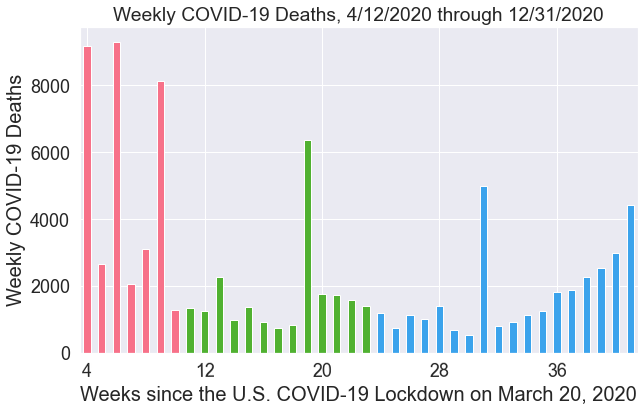

In [165]:
# plot the weekly deaths
colours = {"Wave 1": "#F77189", "Wave 2": "#50B131", "Wave 3": "#3BA3EC"}
ax =covid_wk_case_death_2.Deaths_Diff.plot(kind = 'bar', figsize=(10,6),fontsize=18, color=covid_wk_case_death_2['Wave'].replace(colours), title = "Weekly COVID-19 Deaths, 4/12/2020 through 12/31/2020")
# ax.set_xtick(['0','10','20','30','40'])
plt.xticks(rotation=1, horizontalalignment="center")
plt.locator_params(axis="x", nbins=5) # change the number of x-axis ticks
plt.xlabel('Weeks since the U.S. COVID-19 Lockdown on March 20, 2020', fontsize=20)
plt.ylabel('Weekly COVID-19 Deaths', fontsize=20)
plt.savefig(out_dir + "\Weekly COVID-19 Deaths.jpg",dpi=300)
# ax.legend(['Wave 1', 'Wave 2'])

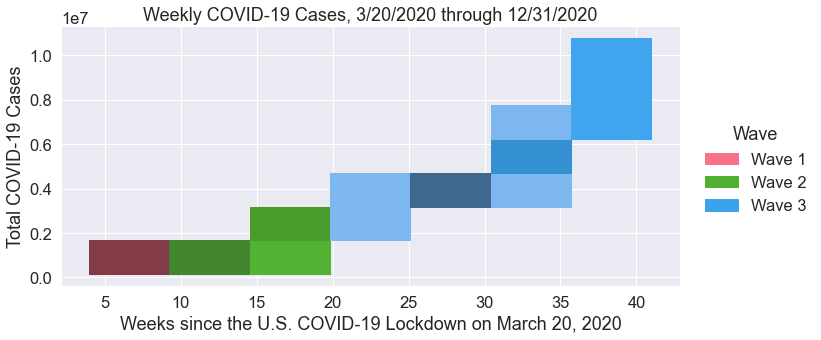

In [535]:

#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)
sns.set(font_scale=1.5) 
# covid_na =covid[~np.isnan(covid)] # remove the NaNs
g = sns.displot(data = covid_case_death, x= "Week", y ="Total_Cases_sum",  hue = "Wave",palette =sns.color_palette("husl", 3), height=5, aspect=2)
g.set_axis_labels("Weeks since the U.S. COVID-19 Lockdown on March 20, 2020", "Total COVID-19 Cases")
plt.title("Weekly COVID-19 Cases, 3/20/2020 through 12/31/2020")

plt.savefig(out_dir + "\Weekly COVID-19 Cases_Old_legend.jpg",dpi=300)
plt.show()

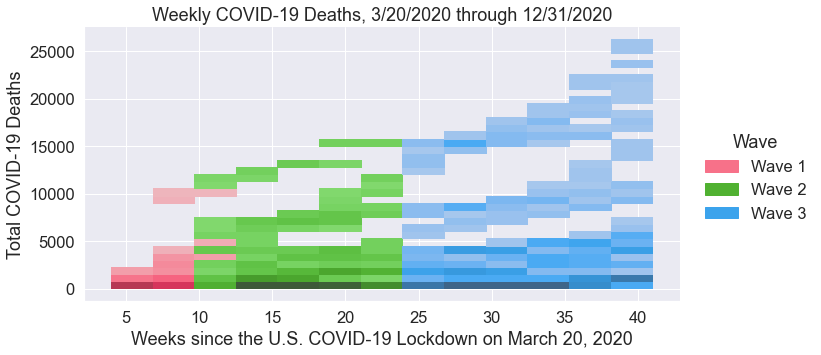

In [404]:
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)
sns.set(font_scale=1.5) 
# covid_na =covid[~np.isnan(covid)] # remove the NaNs
g = sns.displot(data = covid_na, x= "Week", y ="Total_Deaths",  hue = "Wave",palette =sns.color_palette("husl", 3), height=5, aspect=2)
g.set_axis_labels("Weeks since the U.S. COVID-19 Lockdown on March 20, 2020", "Total COVID-19 Deaths")
plt.title("Weekly COVID-19 Deaths, 3/20/2020 through 12/31/2020")
plt.show()

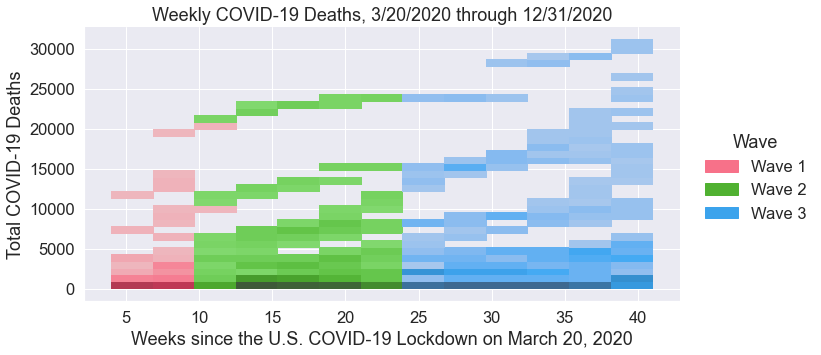

In [405]:
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)
sns.set(font_scale=1.5) 
# covid_na =covid[~np.isnan(covid)] # remove the NaNs
g = sns.displot(data = covid, x= "Week", y ="Total_Deaths",  hue = "Wave",palette =sns.color_palette("husl", 3), height=5, aspect=2)
g.set_axis_labels("Weeks since the U.S. COVID-19 Lockdown on March 20, 2020", "Total COVID-19 Deaths")
plt.title("Weekly COVID-19 Deaths, 3/20/2020 through 12/31/2020")
plt.show()

In [537]:
covid_na =covid[~pd.isnull(covid.Total_Cases)] # remove the NaNs from "Total_Cases" column
covid_na.head()


,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,create_time,Wave,Week,Total_Cases,Total_Deaths,Total_Cases_week
create_time,,,,,,,,,,,,,,,,
2020-04-12,20200412,MA,4271.0,1358.0,1885.0,331.0,199.0,20.0,28.0,13.0,2020-04-12,Wave 1,4,7845.0,260.0,NaN
2020-04-12,20200412,IL,5214.0,5458.0,2513.0,691.0,259.0,308.0,70.0,27.0,2020-04-12,Wave 1,4,13876.0,664.0,NaN
2020-04-12,20200412,CT,3030.0,993.0,1277.0,124.0,343.0,65.0,45.0,6.0,2020-04-12,Wave 1,4,5424.0,459.0,NaN
2020-04-12,20200412,CA,4323.0,945.0,4729.0,1756.0,224.0,54.0,147.0,92.0,2020-04-12,Wave 1,4,11753.0,517.0,NaN
2020-04-12,20200412,AZ,661.0,65.0,286.0,61.0,28.0,2.0,8.0,3.0,2020-04-12,Wave 1,4,1073.0,41.0,NaN


In [591]:
covid.head()


,Time,State,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,create_time,Wave,Week,Total_Cases,Total_Deaths
create_time,,,,,,,,,,,,,,,
2020-04-12,20200412,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,MD,2300.0,3200.0,NaN,190.0,83.0,104.0,NaN,8.0,2020-04-12,Wave 1,4,NaN,NaN
2020-04-12,20200412,MA,4271.0,1358.0,1885.0,331.0,199.0,20.0,28.0,13.0,2020-04-12,Wave 1,4,7845.0,260.0
2020-04-12,20200412,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-12,Wave 1,4,NaN,NaN


In [177]:
# import the csv with both covid per 100k and tweet volume by state abbreviation
CovTw = pd.read_csv("tweet_COVID_per100k_summary_by_wave_state_Final.csv")
CovTw.head()

,Wave,State,A_Case_Per100K,B_Case_Per100K,L_Case_Per100K,W_Case_Per100K,A_Death_Per100K,B_Death_Per100K,L_Death_Per100K,W_Death_Per100K,Twt_Asian,Twt_Black,Twt_Latino,Twt_White
0,Wave 1,AK,100.660385,53.446818,0.000000,57.545383,4.376538,0.000000,0.000000,1.050098,0,0,0,0
1,Wave 1,AL,125.975025,580.842005,0.000000,206.611430,4.394478,21.432715,0.000000,9.576218,0,2,0,0
2,Wave 1,AR,164.478985,516.884145,0.000000,150.531394,2.222689,10.023892,0.000000,3.303606,0,1,0,0
3,Wave 1,AZ,88.971082,231.038271,213.663247,91.349523,5.157744,9.140668,6.434821,8.157520,2,5,0,2
4,Wave 1,CA,126.560121,181.571376,279.996223,67.554292,10.375507,17.424181,10.084485,5.683890,9,77,23,38


In [178]:
CovTw.columns

Index(['Wave', 'State', 'A_Case_Per100K', 'B_Case_Per100K', 'L_Case_Per100K',
       'W_Case_Per100K', 'A_Death_Per100K', 'B_Death_Per100K',
       'L_Death_Per100K', 'W_Death_Per100K', 'Twt_Asian', 'Twt_Black',
       'Twt_Latino', 'Twt_White'],
      dtype='object')

In [179]:
CovTw[['Twt_Asian', 'Twt_Black','Twt_Latino', 'Twt_White' ]].max()

Twt_Asian      18
Twt_Black     227
Twt_Latino     56
Twt_White      84
dtype: int64

In [180]:
waves = (CovTw['Wave'].sort_values(ascending=True).unique()).tolist()

cscale = ['#ADC5CF','#92E0D0','#61D2D1','#2D83A1','#3596B5','#1F5A79','#12355C',]

# cscale = [[0, 'rgb(0,0,255)'], [1, 'rgb(0,50,255)']]
rows = 4
cols = 3
fig = make_subplots(rows=rows, cols=cols, 
    specs = [[{'type': 'choropleth'} for c in np.arange(cols)] for r in np.arange(rows)],
    subplot_titles = waves, vertical_spacing=0.01, horizontal_spacing=0)
fig.update_annotations(font_size=38)

for i, y in enumerate(waves):
    fig.add_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.Twt_Asian[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=150, colorscale=cscale), row = 1, col = i+1)     
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.Twt_Black[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=150, colorscale=cscale), row = 2, col = i+1) 
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.Twt_Latino[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=150, colorscale=cscale), row = 3, col = i+1) 
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.Twt_White[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=150, colorscale=cscale), row = 4, col = i+1) 
    
fig.update_layout(title={'text':'Tweet Volume by Race and Wave', 'xanchor': 'center','x':0.5,},
    **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2,rows*cols+1).tolist()},
    coloraxis_showscale=True, margin={"r":0,"t":70,"l":1,"b":15}, font=dict(family="Calibri",size=42))  

fig.update_traces(showscale=True)
fig.show()
# fig.write_image(out_dir + "\Map Tweet Volume by Race and Wave.jpg",width=2500, height=2000, scale=1, engine="kaleido")


In [181]:
CovTw[['A_Case_Per100K', 'B_Case_Per100K', 'L_Case_Per100K','W_Case_Per100K' ]].max()

A_Case_Per100K    9083.096235
B_Case_Per100K    7819.622632
L_Case_Per100K    9995.185889
W_Case_Per100K    8225.652724
dtype: float64

In [ ]:
["E0DFED","#CCC7EE","#B8B0EF","#A498F0","#9080F1","#7D69F1","#6951F2","#5539F3","#4122F4","#2D0AF5"]

In [182]:
waves = (CovTw['Wave'].sort_values(ascending=True).unique()).tolist()

cscale = ["#E0DFED","#CCC7EE","#B8B0EF","#A498F0","#9080F1","#7D69F1","#6951F2","#5539F3","#4122F4","#2D0AF5"]

# cscale = [[0, 'rgb(0,0,255)'], [1, 'rgb(0,50,255)']]
rows = 4
cols = 3
fig = make_subplots(rows=rows, cols=cols, 
    specs = [[{'type': 'choropleth'} for c in np.arange(cols)] for r in np.arange(rows)],
    subplot_titles = waves, vertical_spacing=0.01, horizontal_spacing=0)
fig.update_annotations(font_size=38)

for i, y in enumerate(waves):
    fig.add_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.A_Case_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=10000, colorscale=cscale), row = 1, col = i+1)     
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.B_Case_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=10000, colorscale=cscale), row = 2, col = i+1) 
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.L_Case_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=10000, colorscale=cscale), row = 3, col = i+1) 
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.W_Case_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=10000, colorscale=cscale), row = 4, col = i+1) 
    
fig.update_layout(title={'text':'COVID-19 Cases by Race and Wave', 'xanchor': 'center','x':0.5,},
    **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2,rows*cols+1).tolist()},
    coloraxis_showscale=True, margin={"r":0,"t":70,"l":1,"b":15}, font=dict(family="Calibri",size=42))  

fig.update_traces(showscale=True)
fig.show()
fig.write_image(out_dir + "\Map COVID-19 Cases by Race and Wave.jpg",width=2500, height=2000, scale=1, engine="kaleido")

In [65]:
CovTw[['A_Death_Per100K', 'B_Death_Per100K','L_Death_Per100K', 'W_Death_Per100K' ]].max()

A_Death_Per100K     95.190316
B_Death_Per100K    186.243793
L_Death_Per100K    160.215531
W_Death_Per100K    139.383203
dtype: float64

In [176]:
waves = (CovTw['Wave'].sort_values(ascending=True).unique()).tolist()

cscale = ["#E0DFED","#CCC7EE","#B8B0EF","#A498F0","#9080F1","#7D69F1","#6951F2","#5539F3","#4122F4","#2D0AF5"]

# cscale = [[0, 'rgb(0,0,255)'], [1, 'rgb(0,50,255)']]
rows = 4
cols = 3
fig = make_subplots(rows=rows, cols=cols, 
    specs = [[{'type': 'choropleth'} for c in np.arange(cols)] for r in np.arange(rows)],
    subplot_titles = waves, vertical_spacing=0.01, horizontal_spacing=0)
fig.update_annotations(font_size=38)

for i, y in enumerate(waves):
    fig.add_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.A_Death_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=186, colorscale=cscale), row = 1, col = i+1)     
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.B_Death_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=186, colorscale=cscale), row = 2, col = i+1) 
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.L_Death_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=186, colorscale=cscale), row = 3, col = i+1) 
    fig.append_trace(go.Choropleth(locations=CovTw.State[CovTw['Wave']==y],z = CovTw.W_Death_Per100K[CovTw['Wave']==y],
              locationmode = 'USA-states', zmin=0, zmax=186, colorscale=cscale), row = 4, col = i+1) 
    
fig.update_layout(title={'text':'COVID-19 Deaths by Race and Wave', 'xanchor': 'center','x':0.5,},
    **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2,rows*cols+1).tolist()},
    coloraxis_showscale=True, margin={"r":0,"t":70,"l":1,"b":15}, font=dict(family="Calibri",size=42))  

fig.update_traces(showscale=True)
fig.show()
# fig.write_image(out_dir + "\Map COVID-19 Deaths by Race and Wave.jpg",width=2500, height=2000, scale=1, engine="kaleido")

In [183]:
CovTwPop = pd.read_csv("tweet_COVID_Pop_summary_by_wave_state_final.csv")
CovTwPop.head()

,Wave,State,Cases_Asian,Cases_Black,Cases_Latinx,Cases_White,Deaths_Asian,Deaths_Black,Deaths_Latinx,Deaths_White,Asian_Pop,Black_Pop,Latino_Pop,White_Pop,Twt_Asian,Twt_Black,Twt_Latino,Twt_White
0,Wave 1,AK,46.0,13.0,NaN,274.0,2.0,0.0,NaN,5.0,45698.216,24323.244,5.159476e+04,4.761459e+05,0,0,0,0
1,Wave 1,AL,86.0,7534.0,NaN,6861.0,3.0,278.0,NaN,318.0,68267.500,1297082.500,2.096788e+05,3.320726e+06,0,2,0,0
2,Wave 1,AR,74.0,2372.0,NaN,3463.0,1.0,46.0,NaN,76.0,44990.550,458903.610,2.249528e+05,2.300517e+06,0,1,0,0
3,Wave 1,AZ,207.0,733.0,4715.0,4972.0,12.0,29.0,142.0,444.0,232659.867,317263.455,2.206744e+06,5.442831e+06,2,5,0,2
4,Wave 1,CA,7209.0,4137.0,42897.0,15843.0,591.0,397.0,1545.0,1333.0,5696107.065,2278442.826,1.532056e+07,2.345225e+07,9,77,23,38


In [193]:
regression_model = sklearn.linear_model.LinearRegression()

training_data_1 = CovTwPop.loc[CovTwPop['Wave']=='Wave 1',['Asian_Pop','Twt_Asian']]
target_values_1 = CovTwPop.loc[CovTwPop['Wave']=='Wave 1',["Cases_Asian"]].fillna(0)

regression_model.fit(training_data_1, target_values_1)

estimates = regression_model.coef_
print(estimates)

[[ 1.34790575e-03 -1.05768644e+02]]
